In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
# Load the dataset

df = pd.read_csv('/content/train.csv')

# Display the first few rows of the dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
# Get information about the dataset, including data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Find Missing Data**

In [85]:
# Calculate the number of missing values for each column

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

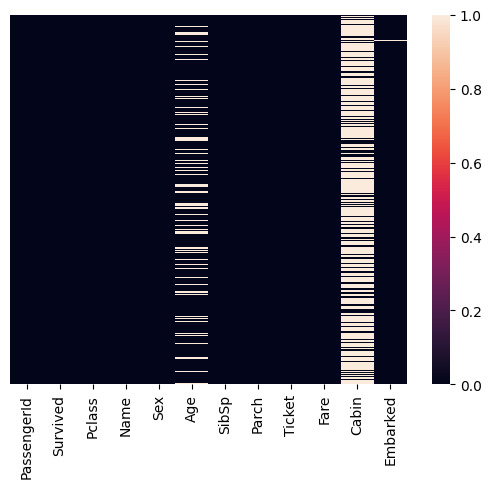

In [86]:
# Visualize missing data using a heatmap

sns.heatmap(df.isnull(),yticklabels=False)

**Data Cleaning**

In [87]:
# Fill missing age values with the mean age

df['Age'] = df['Age'].fillna(df['Age'].mean)

In [88]:
# Check if there are still any missing age values

df['Age'].isnull().sum()

0

In [89]:
# Function to generate random cabin values with one alphabet and 2-3 digits

def generate_random_cabin():
    # Randomly choose a single alphabet (A-Z) and a number (10-999)
    deck = np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))  # Single alphabet
    number = np.random.randint(10, 1000)  # 2 or 3 digit number
    return f"{deck}{number}"

# Assuming 'Cabin' column has NaN values
# Fill NaN values in 'Cabin' column with the generated cabin numbers

df['Cabin'] = df['Cabin'].apply(lambda x: x if pd.notnull(x) else generate_random_cabin())

# Verify that the NaN values are replaced

print(df['Cabin'].head())


0    M920
1     C85
2     Q38
3    C123
4    G429
Name: Cabin, dtype: object


**Find the survived**

<Axes: xlabel='Survived', ylabel='count'>

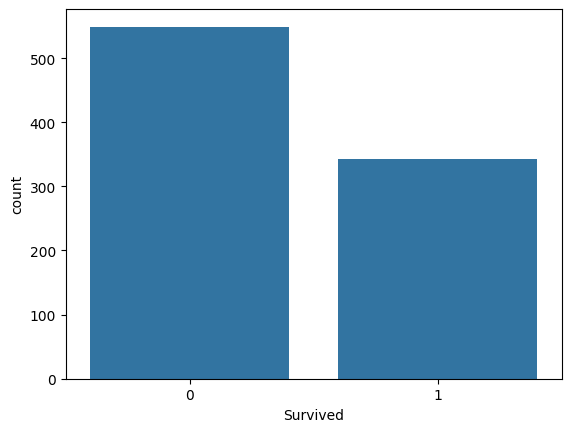

In [90]:
# Create a countplot to show the number of survivors and non-survivors

sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

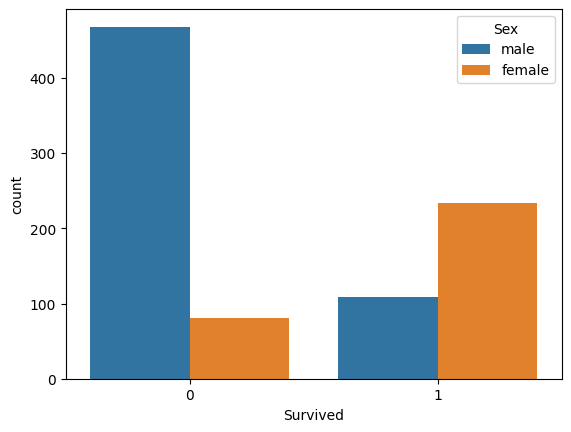

In [91]:
 # Create a countplot to show the number of survivors and non-survivors based on sex

 sns.countplot(x='Survived', hue='Sex', data=df)

<Axes: xlabel='Survived', ylabel='count'>

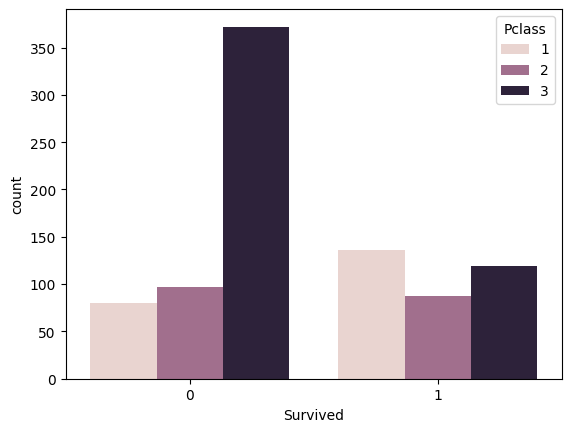

In [92]:
# Create a countplot to show the number of survivors and non-survivors based on passenger class

sns.countplot(x='Survived', hue='Pclass', data=df)

In [98]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200
